In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [46]:
n = 1000
p = 0.5
q = 0.2
sigma = 2*np.random.randint(0, 2, (n,1)) - 1

In [47]:
cohort = (1 + sigma @ sigma.T)//2

In [48]:
A = np.zeros((n,n))
for i in range(0, n):
    for j in range(i+1, n):
        if cohort[i, j]:
            A[i, j] = A[j, i] = np.random.random() < p
        else:
            A[i, j] = A[j, i] = np.random.random() < q

In [49]:
D = np.diag(np.sum(A, axis=1))
L = D - A
w, V = np.linalg.eig(L)
s = np.argsort(w)
V = V[:, s]
w = w[s]

In [50]:
G = nx.from_numpy_array(A)
edge_colors = []
color_map = {1:'red', -1:'blue'}
for edge in nx.edges(G):
    group = sigma[edge[0], 0]
    edge_colors.append(color_map[group])

spring_pos = nx.spring_layout(G)

spectral_pos = dict()
for i in range(n):
    spectral_pos[i] = np.array((V[i, 1], V[i, 2]))


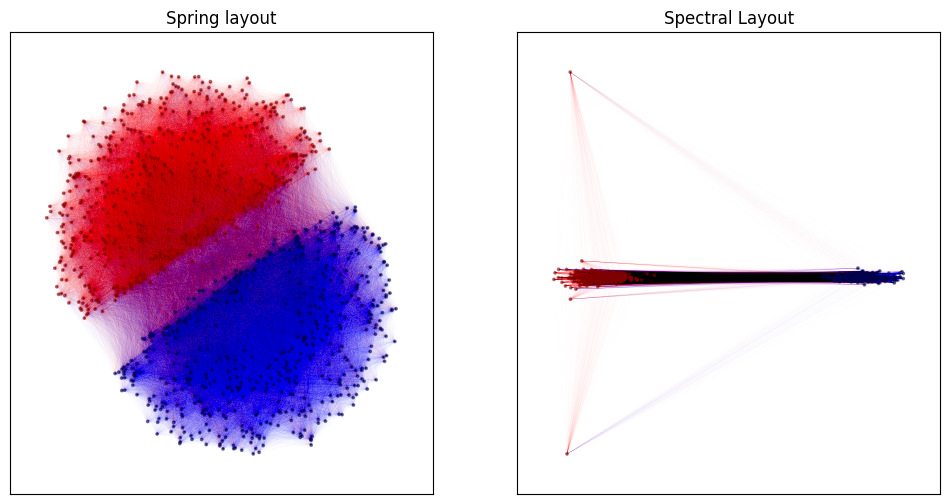

In [51]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Spring layout')
nx.draw_networkx_edges(G, pos=spring_pos, edge_color=edge_colors, alpha=0.05, width=0.04)
nx.draw_networkx_nodes(G, pos=spring_pos, node_size=3, node_color=sigma, cmap='seismic', alpha=0.5)



plt.subplot(1,2,2)
plt.title('Spectral Layout')
nx.draw_networkx_edges(G, pos=spectral_pos, edge_color=edge_colors, alpha=0.05, width=0.05)
nx.draw_networkx_nodes(G, pos=spectral_pos, node_size=3, node_color=sigma, cmap='seismic', alpha=0.5)

From the plot, we can see that the second and third eigenvectors of the Laplacian matrix can be used for spectral separation.

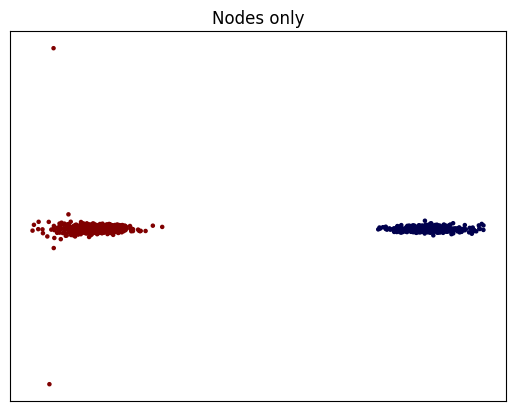

In [52]:
plt.title('Nodes only')
nx.draw_networkx_nodes(G, pos=spectral_pos, node_size=5, node_color=sigma, cmap='seismic')

In [53]:
from sklearn.cluster import KMeans

In [55]:
result = KMeans(n_clusters=2, n_init='auto').fit(V[:, [1, 2]])
labels = np.array(result.labels_)

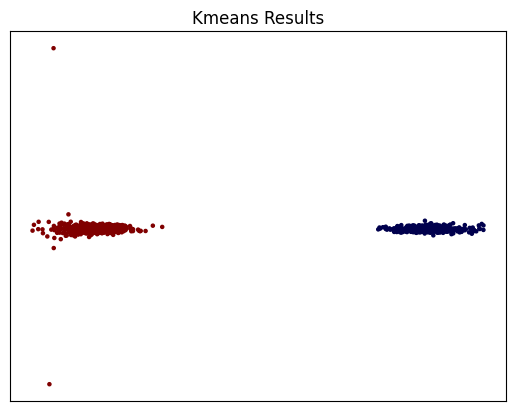

In [56]:
plt.title('Kmeans Results')
nx.draw_networkx_nodes(G, pos=spectral_pos, node_size=5, node_color=labels, cmap='seismic')

In [23]:
def graph_generator(n, a, b):
    p = a*np.log10(n)/n
    q = b*np.log10(n)/n
    sigma = 2*np.random.randint(0, 2, (n,1)) - 1

    cohort = (1 + sigma @ sigma.T)//2

    A = np.zeros((n,n))
    for i in range(0, n):
        for j in range(i+1, n):
            if cohort[i, j]:
                A[i, j] = A[j, i] = np.random.random() < p
            else:
                A[i, j] = A[j, i] = np.random.random() < q

    return A, sigma

In [41]:
def V1(A):
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    w, V = np.linalg.eig(L)
    s = np.argsort(w)
    V = V[:, s]
    w = w[s]
    return V[:, [1, 2]]#.reshape((A.shape[0], 1))

miss classified nodes for n = 1000:  0.100%
miss classified nodes for n = 2000:  0.200%
miss classified nodes for n = 3000:  1.500%


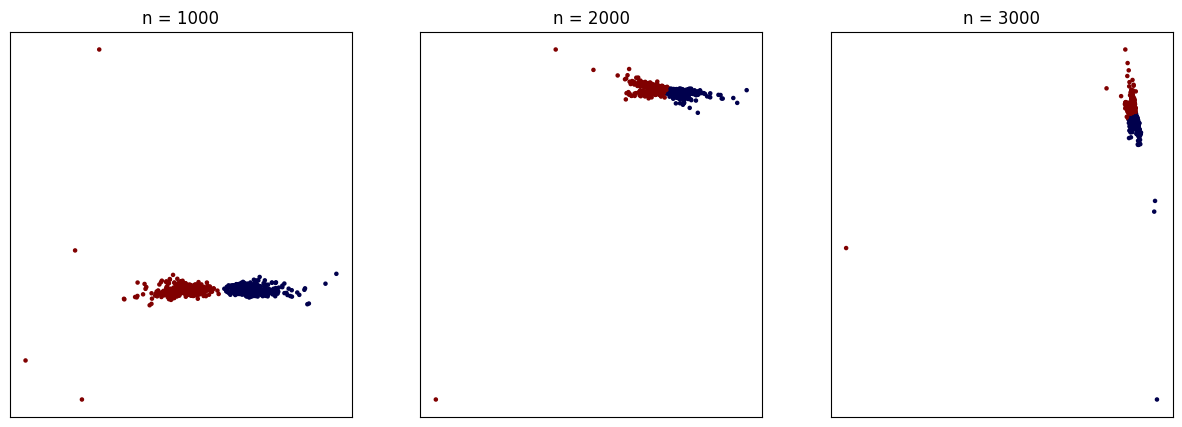

In [43]:
N = [1000, 2000, 3000]
a = 135
b = 100

fig = plt.figure(figsize=(15, 5))
for i,n in enumerate(N):
    A, s = graph_generator(n, a, b)
    s = (s+1)//2
    s = s.flatten()
    plt.subplot(1, 3, i+1)
    plt.title(f'n = {n}')
    V = V1(A)
    result = KMeans(n_clusters=2, n_init='auto').fit(V)
    l = np.array(result.labels_)
    G = nx.from_numpy_array(A)
    nx.draw_networkx_nodes(G, pos=nx.spectral_layout(G), node_size=5, node_color=s, cmap='seismic')
    print(f'miss classified nodes for n = {n}:  {min( np.sum(np.abs(s-l)), np.sum(np.abs(s-(1-l))) )/n*100:.3f}%')

miss classified nodes for n = 1000:  0.100%
miss classified nodes for n = 2000:  0.100%
miss classified nodes for n = 3000:  0.100%


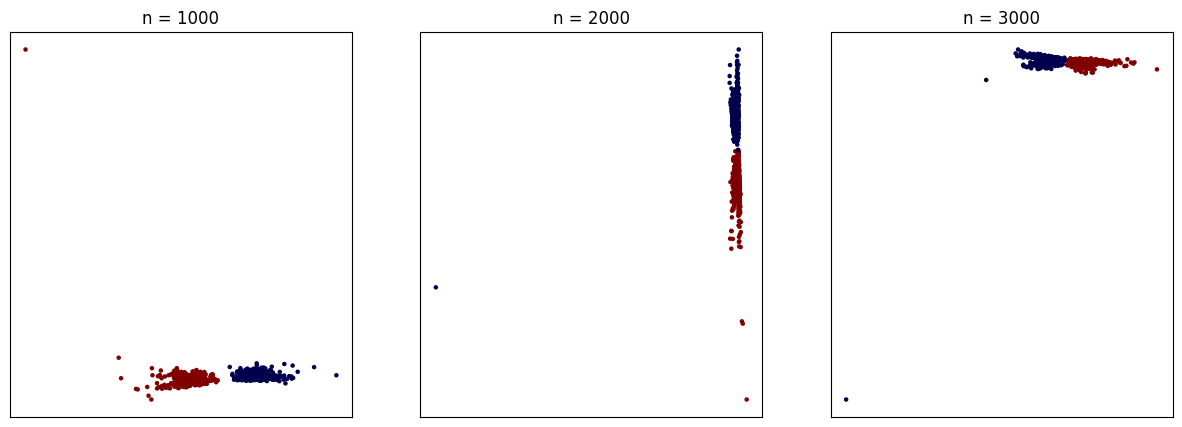

In [60]:
N = [1000, 2000, 3000]
a = 140
b = 100

fig = plt.figure(figsize=(15, 5))
for i,n in enumerate(N):
    A, s = graph_generator(n, a, b)
    s = (s+1)//2
    s = s.flatten()
    plt.subplot(1, 3, i+1)
    plt.title(f'n = {n}')
    V = V1(A)
    result = KMeans(n_clusters=2, n_init='auto').fit(V)
    l = np.array(result.labels_)
    G = nx.from_numpy_array(A)
    nx.draw_networkx_nodes(G, pos=nx.spectral_layout(G), node_size=5, node_color=s, cmap='seismic')
    print(f'miss classified nodes for n = {n}:  {min( np.sum(np.abs(s-l)), np.sum(np.abs(s-(1-l))) )/n*100:.3f}%')

miss classified nodes for n = 1000:  0.100%
miss classified nodes for n = 2000:  0.000%
miss classified nodes for n = 3000:  0.033%


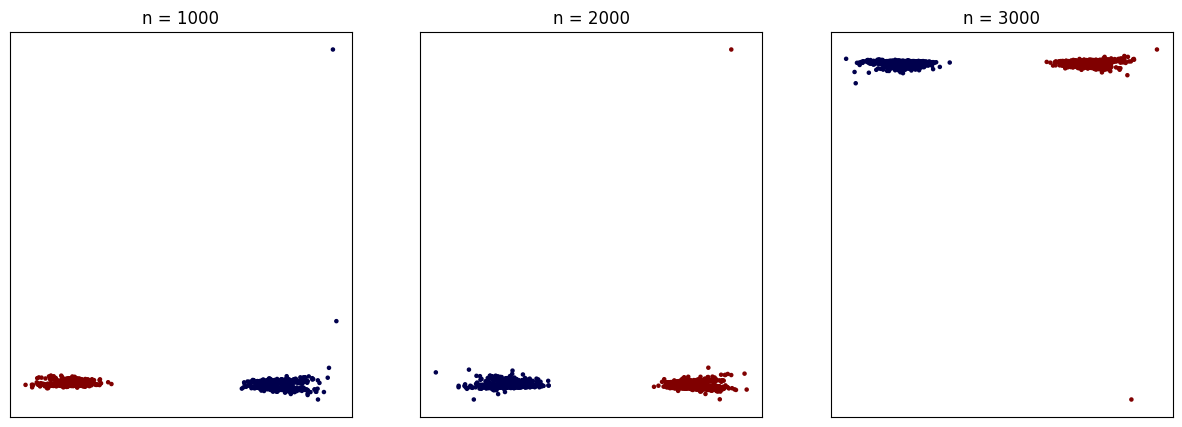

In [62]:
N = [1000, 2000, 3000]
a = 200
b = 100

fig = plt.figure(figsize=(15, 5))
for i,n in enumerate(N):
    A, s = graph_generator(n, a, b)
    s = (s+1)//2
    s = s.flatten()
    plt.subplot(1, 3, i+1)
    plt.title(f'n = {n}')
    V = V1(A)
    result = KMeans(n_clusters=2, n_init='auto').fit(V)
    l = np.array(result.labels_)
    G = nx.from_numpy_array(A)
    nx.draw_networkx_nodes(G, pos=nx.spectral_layout(G), node_size=5, node_color=s, cmap='seismic')
    print(f'miss classified nodes for n = {n}:  {min( np.sum(np.abs(s-l)), np.sum(np.abs(s-(1-l))) )/n*100:.3f}%')